In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

# read data
reviews_df_main = pd.read_excel("RC.xlsx")
reviews_df = pd.DataFrame()
reviews_df['review'] = reviews_df_main["Review"]
reviews_df['OTA'] = reviews_df_main['OTA']
reviews_df['gender'] = reviews_df_main['Gender']
reviews_df.head()

,review,OTA,gender
0,"Hello all, I am writing a review on Makemytrip...",MMT,male
1,"Hello Friends,\nI have booked a room in Raddis...",MMT,Male
2,I was trying to book an intl flight for 4 pass...,MMT,male
3,Unbeatable match with other trip booking apps ...,MMT,female
4,They cannot be reliable in matter of hotel boo...,MMT,male


In [0]:
reviews_df["review"] = [x.replace("\n", " ") for x in reviews_df["review"] ]

In [0]:
reviews_df["gender"] = reviews_df["gender"].str.lower()
reviews_df["gender"] = reviews_df["gender"].str.strip()
reviews_df.dropna(subset=['gender'],inplace=True)
#reviews_df['gender'].unique()

#reviews_df = reviews_df[reviews_df["gender"] == "male"]

In [39]:

# return the wordnet object value corresponding to the POS tag
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    #stop = stopwords.words('english')
    #text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review"] = reviews_df["review"].apply(lambda x : str(x))
reviews_df["review_clean"] = reviews_df['review'].apply(lambda x: clean_text(x))
reviews_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,OTA,gender,review_clean
0,"Hello all, I am writing a review on Makemytrip...",MMT,male,hello all be write review on makemytrip.com in...
1,"Hello Friends, I have booked a room in Raddiso...",MMT,male,hello friend have book room in raddison atrium...
2,I was trying to book an intl flight for 4 pass...,MMT,male,be try to book an intl flight for passenger fr...
3,Unbeatable match with other trip booking apps ...,MMT,female,unbeatable match with other trip book apps it ...
4,They cannot be reliable in matter of hotel boo...,MMT,male,they cannot be reliable in matter of hotel boo...


In [40]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
reviews_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,OTA,gender,review_clean,neg,neu,pos,compound
0,"Hello all, I am writing a review on Makemytrip...",MMT,male,hello all be write review on makemytrip.com in...,0.000,0.785,0.215,0.9970
1,"Hello Friends, I have booked a room in Raddiso...",MMT,male,hello friend have book room in raddison atrium...,0.097,0.860,0.043,-0.4435
2,I was trying to book an intl flight for 4 pass...,MMT,male,be try to book an intl flight for passenger fr...,0.019,0.807,0.173,0.9412
3,Unbeatable match with other trip booking apps ...,MMT,female,unbeatable match with other trip book apps it ...,0.000,0.729,0.271,0.9837
4,They cannot be reliable in matter of hotel boo...,MMT,male,they cannot be reliable in matter of hotel boo...,0.000,0.954,0.046,0.4310


In [6]:

def findlevels(x):
  if x >= -1.0 and x <= -0.7 : return "level1"
  elif x > -0.7 and x <= -0.3 : return "level2" 
  elif x > -0.3 and x <= 0.2 : return "level3" 
  elif x > 0.2 and x <= 0.6 : return "level4"
  elif x > 0.76 and x <= 1.0 : return "level5" 


reviews_df["level"] = reviews_df["compound"].apply(lambda x: findlevels(x)) 
reviews_df.head(10)

,review,OTA,gender,review_clean,neg,neu,pos,compound,level
0,"Hello all, I am writing a review on Makemytrip...",MMT,male,hello all be write review on makemytrip.com in...,0.000,0.785,0.215,0.9970,level5
1,"Hello Friends, I have booked a room in Raddiso...",MMT,male,hello friend have book room in raddison atrium...,0.097,0.860,0.043,-0.4435,level2
2,I was trying to book an intl flight for 4 pass...,MMT,male,be try to book an intl flight for passenger fr...,0.019,0.807,0.173,0.9412,level5
3,Unbeatable match with other trip booking apps ...,MMT,female,unbeatable match with other trip book apps it ...,0.000,0.729,0.271,0.9837,level5
4,They cannot be reliable in matter of hotel boo...,MMT,male,they cannot be reliable in matter of hotel boo...,0.000,0.954,0.046,0.4310,level4
5,A gyst on just concluded 'THAILAND TOUR'... Th...,MMT,male,gyst on just conclude thailand tour there be f...,0.074,0.807,0.119,0.7983,level5
6,Recently I booked Flight ticket of my child fr...,MMT,male,recently book flight ticket of my child from d...,0.049,0.870,0.082,0.4939,level4
7,I booked a ticket for Lucknow from Delhi Anand...,MMT,male,book ticket for lucknow from delhi anand vihar...,0.105,0.839,0.056,-0.8591,level1
8,On 28 Nov 2017 I had booked a flight ticket fo...,MMT,male,on nov have book flight ticket for kolkata to ...,0.060,0.827,0.113,0.8263,level5
9,"So, I booked my ticket from MakeMyTrip on 13th...",MMT,female,so book my ticket from makemytrip on of novemb...,0.018,0.936,0.046,0.4310,level4


In [0]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [41]:
total_positive = len(reviews_df[reviews_df["compound"] >= 0 ])
total_negative = len(reviews_df[reviews_df["compound"] < 0 ])
print("negative reviews:", total_negative )
print("positive reviews:", total_positive )
total = total_negative + total_positive
print("total: ", total )
#reviews_df[reviews_df["compound"] < 0 ].sort_values("compound", ascending=True)[["review","OTA", "neg","pos", "compound"]].head()

negative reviews: 1075
positive reviews: 1106
total:  2181


In [26]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("compound", ascending = False)[["review","OTA", "pos","neg", "compound"]].head(10)


KeyError: ignored

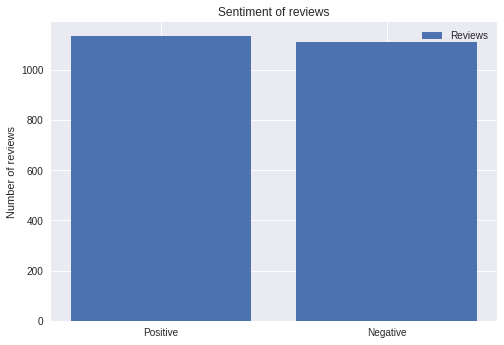

In [27]:
sentiment=['Positive','Negative']
revenue=[total_positive, total_negative]
xpos = np.arange(len(sentiment))
plt.bar(xpos,revenue, label="Reviews")

plt.xticks(xpos,sentiment)
plt.ylabel("Number of reviews")
plt.title('Sentiment of reviews')
plt.savefig("positive negative ratio", dpi = 400 )
plt.legend()

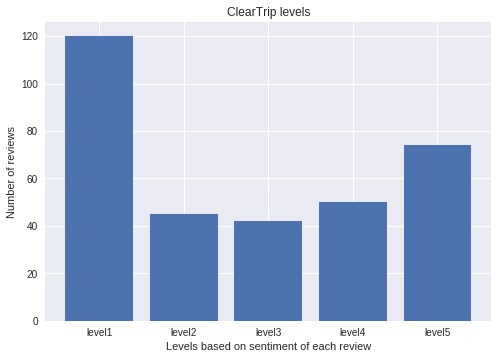

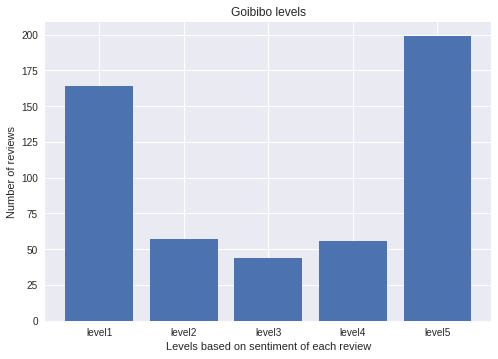

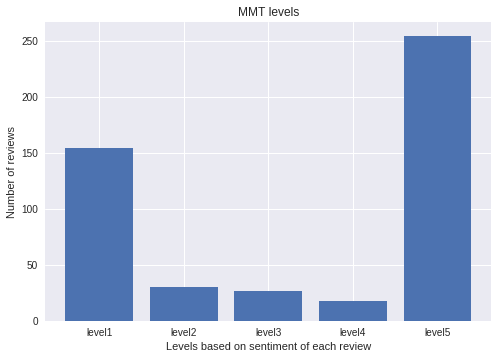

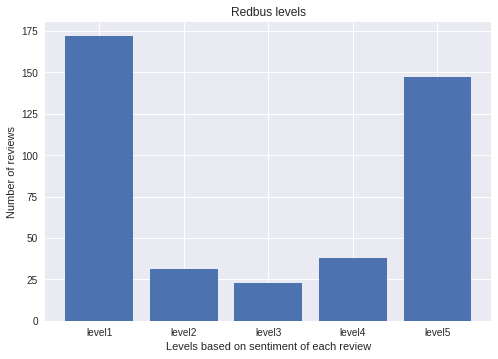

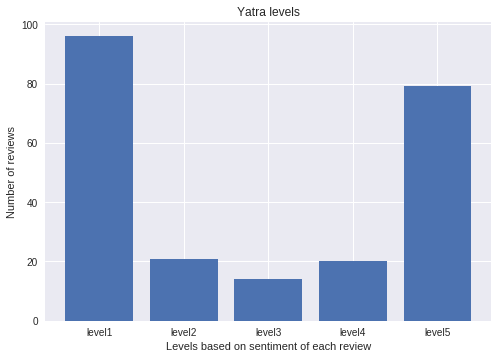

In [0]:
leveln=[ "level"+str(i) for i in range(1,6)]
OTAs = ['ClearTrip', 'Goibibo', 'MMT', 'Redbus', 'Yatra']
for OTA in OTAs:
  levels = []
  reviews_OTA_df = reviews_df[reviews_df['OTA'] == OTA]
  for i in range(1,6):
    levels.append(len(reviews_OTA_df[reviews_OTA_df["level"]  == "level"+str(i) ]))   

  xpos = np.arange(len(levels))
  plt.bar(leveln,levels)

  plt.xticks(xpos,leveln)
  plt.ylabel("Number of reviews")
  plt.xlabel("Levels based on sentiment of each review")

  plt.title(OTA+' levels')
  plt.savefig(OTA+" levels", dpi = 400 )
  plt.show()



In [0]:
leveln=[ "level"+str(i) for i in range(1,6)]
levels = []

reviews_OTA_df = reviews_df[reviews_df['OTA'] == "MMT"]
for i in range(1,6):
  levels.append(len(reviews_OTA_df[reviews_OTA_df["level"]  == "level"+str(i) ]))
  print(f"{leveln[i-1]} = {levels[i-1]}")


level1 = 154
level2 = 30
level3 = 27
level4 = 18
level5 = 254


In [0]:
OTAs = ['ClearTrip', 'Goibibo', 'MMT', 'Redbus', 'Yatra']

!pip install xlsxwriter
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('temp.xlsx') 
worksheet = workbook.add_worksheet() 

for i in range(1,6):
  worksheet.write(0 , i , "level "+str(i))

for i in range(5):
  reviews_OTA_df = reviews_df[reviews_df['OTA'] == OTAs[i]]
  worksheet.write(i+1, 0 , OTAs[i])
  levels = []
  for j in range(1,6):
    levels.append(len(reviews_OTA_df[reviews_OTA_df["level"]  == "level"+str(j) ]))
    worksheet.write(i+1 , j , levels[j-1])

workbook.close()


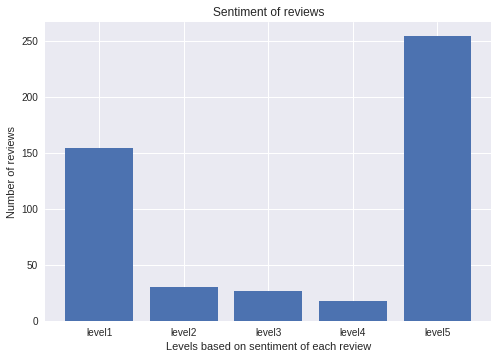

In [0]:

xpos = np.arange(len(levels))
plt.bar(leveln,levels)

plt.xticks(xpos,leveln)
plt.ylabel("Number of reviews")
plt.xlabel("Levels based on sentiment of each review")

plt.title('Sentiment of reviews')
plt.savefig("levels", dpi = 400 )


In [42]:

#reviews_df[reviews_df['OTA'] == 'MMT'].sort_values("compound", ascending = True)[["review","OTA",  "neg","pos", "compound"]].head(10)
'''
mmt_pos = len(reviews_df[(reviews_df['OTA'] == 'MMT') & (reviews_df["compound"] > 0 ) ])
mmt_neg = len(reviews_df[(reviews_df['OTA'] == 'MMT') & (reviews_df["compound"] < 0 ) ])
yatra_pos = len(reviews_df[(reviews_df['OTA'] == 'Yatra') & (reviews_df["compound"] > 0 ) ])
yatra_neg = len(reviews_df[(reviews_df['OTA'] == 'Yatra') & (reviews_df["compound"] < 0 ) ])
'''
posm = reviews_df[(reviews_df["compound"]  >= 0 ) & (reviews_df["gender"] == "male") ].groupby('OTA')["OTA"].apply(list)
posf = reviews_df[(reviews_df["compound"]  >= 0 ) & (reviews_df["gender"] == "female") ].groupby('OTA')["OTA"].apply(list)
negm = reviews_df[(reviews_df["compound"]  < 0 ) & (reviews_df["gender"] == "male") ].groupby('OTA')["OTA"].apply(list)
negf = reviews_df[(reviews_df["compound"]  < 0 ) & (reviews_df["gender"] == "female") ].groupby('OTA')["OTA"].apply(list)

OTA = []
posim = []
posif = []
negim = []
negif = []
for i in range(5):
  OTA.append(posm[i][0])
  posim.append(len(posm[i]))
  negim.append(len(negm[i]))
  posif.append(len(posf[i]))
  negif.append(len(negf[i]))
  
  print(OTA[i]," : Positivem:  ", posim[i], " Negativem: ", negim[i])
  print(OTA[i]," : Positivef:  ", posif[i], " Negativef: ", negif[i])




ClearTrip  : Positivem:   117  Negativem:  125
ClearTrip  : Positivef:   48  Negativef:  62
Goibibo  : Positivem:   230  Negativem:  199
Goibibo  : Positivef:   73  Negativef:  80
MMT  : Positivem:   199  Negativem:  126
MMT  : Positivef:   92  Negativef:  98
Redbus  : Positivem:   152  Negativem:  154
Redbus  : Positivef:   73  Negativef:  90
Yatra  : Positivem:   75  Negativem:  69
Yatra  : Positivef:   47  Negativef:  72


In [0]:
pos = reviews_df[(reviews_df["compound"]  >= 0 ) & (reviews_df["gender"] == "female") ].groupby('OTA')["OTA"].apply(list)
len(pos[1])

73

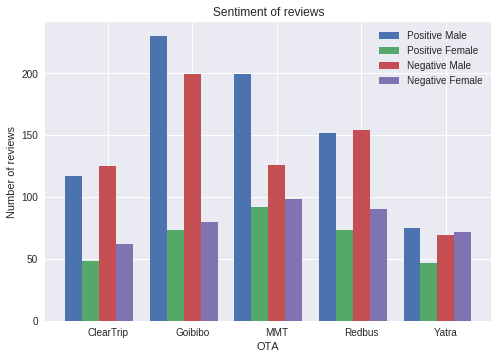

In [0]:
xpos = np.arange(len(OTA))
plt.bar(xpos-0.4,posim, width=0.2, label="Positive Male")
plt.bar(xpos-0.2,posif, width=0.2, label="Positive Female")
plt.bar(xpos,negim, width=0.2,label="Negative Male")
plt.bar(xpos+0.2,negif, width=0.2,label="Negative Female")


plt.xticks(xpos,OTA)
plt.ylabel("Number of reviews")

plt.xlabel("OTA")
plt.title('Sentiment of reviews')
plt.legend()
plt.savefig("Sentiment of reviews with gender.png" , dpi = 300)
plt.show()

In [0]:
print(OTA)

fig1, axes1 = plt.subplots(1, 1)
fig2, axes2 = plt.subplots(1, 1)
fig3, axes3 = plt.subplots(1, 1)
fig4, axes4 = plt.subplots(1, 1)
fig5, axes5 = plt.subplots(1, 1)
'''
plt.axis("equal")
plt.pie(values,labels=sentiment, autopct='%1.1f%%',radius=1.5)
plt.show()
'''
sentiment = ["positive" , "negative"]

axes1.set_title(OTA[0]) 
values = [posi[0] , negi[0]]
axes1.pie(values,labels=sentiment, autopct='%1.1f%%')

axes2.set_title(OTA[1]) 
values = [posi[1] , negi[1]]
axes2.pie(values,labels=sentiment, autopct='%1.1f%%')

axes3.set_title(OTA[2]) 
values = [posi[2] , negi[2]]
axes3.pie(values,labels=sentiment, autopct='%1.1f%%')

axes4.set_title(OTA[3]) 
values = [posi[3] , negi[3]]
axes4.pie(values,labels=sentiment, autopct='%1.1f%%')

axes5.set_title(OTA[4]) 
values = [posi[4] , negi[4]]
axes5.pie(values,labels=sentiment, autopct='%1.1f%%')



plt.show()


In [0]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("Positive negative.pdf")
for fig in range(1, plt.gcf().number + 1): 
    pdf.savefig( fig1 )
    pdf.savefig( fig2 )
    pdf.savefig( fig3 )
    pdf.savefig( fig4 )
    pdf.savefig( fig5 )
    
    
pdf.close()



<Figure size 576x396 with 0 Axes>

In [0]:
!pip install xlsxwriter
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('temp.xlsx') 
worksheet = workbook.add_worksheet() 
l = 0

for i in range(5):
  worksheet.write(l, 0 , OTA[i])
  worksheet.write(l+1, 0 , "Male")
  worksheet.write(l+2, 0 , "Female")
  worksheet.write(l, 1 , "Postive")
  worksheet.write(l, 2 , "Negative")
  worksheet.write(l+1, 1 , posim[i])
  worksheet.write(l+2, 1 , posif[i])
  worksheet.write(l+1, 2 , negim[i])
  worksheet.write(l+2, 2, negif[i])
  l += 4


workbook.close()